In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os

import matplotlib.pyplot as plt

sys.path.append(os.path.dirname(os.getcwd()))

import ablt.plotting as plot
from ablt.utilities import *
from ablt.signal_processing import *
from ablt.bass_line_transcriber.transcription import frequency_to_midi_sequence, midi_sequence_to_midi_array
from ablt.constants import FS
from ablt.directories import DATA_DIR, OUTPUT_DIR, TRACK_DICTS_PATH, FIGURES_DIR

frame_factor = 2

x = OUTPUT_DIR+'_32_frame{}'.format(frame_factor)


track_titles = os.listdir(x)

track_dicts = read_track_dicts(TRACK_DICTS_PATH)

In [2]:
track_titles = sorted(os.listdir(OUTPUT_DIR))
for i, title in enumerate(track_titles):
    print(i, title)

0 ANOTR - Help (Extended Mix)
1 Amine Edge & DANCE - Get Busy
2 Billy Kenny & Huxley - Sweat
3 Biscits - Sundown
4 Boogie Vice - Enter The Rave
5 Camelphat - Drop it (Mason Maynard Remix)
6 Carl Cox - I Want You (Forever) - Josh Butler Remix
7 Cristoph 'Do To Me'
8 Dave Winnel - Popcorn
9 Dennis Cruz - El Sueño (feat Martina Camargo)
10 Dopamine Machine - Club Mix


In [7]:
track_title = track_titles[3]
print(track_title)

M = 1
output_dir = os.path.join(OUTPUT_DIR, track_title)
#output_dir = os.path.join(x, track_title)

bassline_path = os.path.join(output_dir, 'bass_line', track_title+'.npy')
F0_path = os.path.join(output_dir, 'F0_estimate', track_title+'.npy')
pitch_track_path = os.path.join(output_dir, 'pitch_track', track_title+'.npy')
q_pitch_track_path = os.path.join(output_dir, 'quantized_pitch_track', track_title+'.npy')

chorus_beat_positions = get_chorus_beat_positions(output_dir)
bassline = np.load(bassline_path)
F0_estimate = np.load(F0_path)
pitch_track = np.load(pitch_track_path)
quantized_pitch_track = np.load(q_pitch_track_path)
midi_sequence = frequency_to_midi_sequence(quantized_pitch_track[1])

midi_array = midi_sequence_to_midi_array(midi_sequence, M)

Biscits - Sundown


Source Separation is not Perfect by ANOTR, Billy Kenny
Drop detection is not perfect by amine edge
Drop detection is bad by Sundown
    Dennis Cruz - El Sueño (feat Martina Camargo

Carl Cox - I Want You (Forever) good synth recons
Cristoph 'Do To Me' good note, even groove!


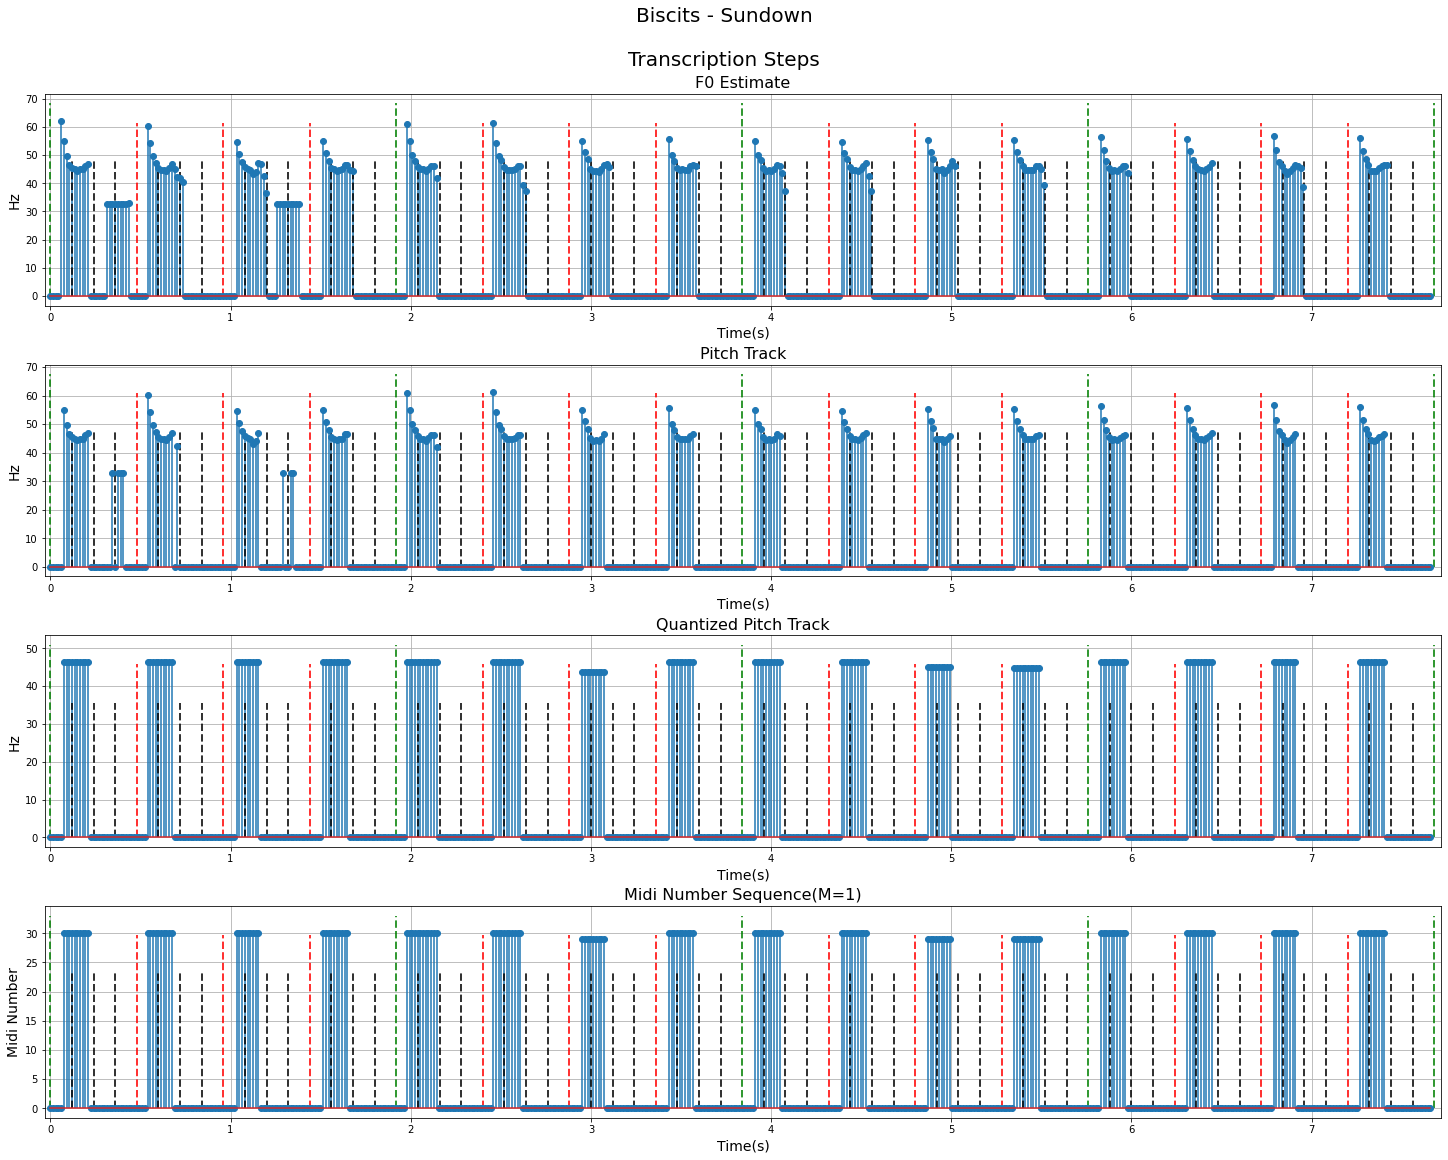

In [8]:
#figures_dir = os.path.join(FIGURES_DIR, str(frame_factor))
figures_dir = ''

plot.F0_related_stem(track_title, chorus_beat_positions, F0_estimate,
                     pitch_track, quantized_pitch_track, midi_sequence, M=1,
                    plot_dir=figures_dir)

## Plot all the Tracks

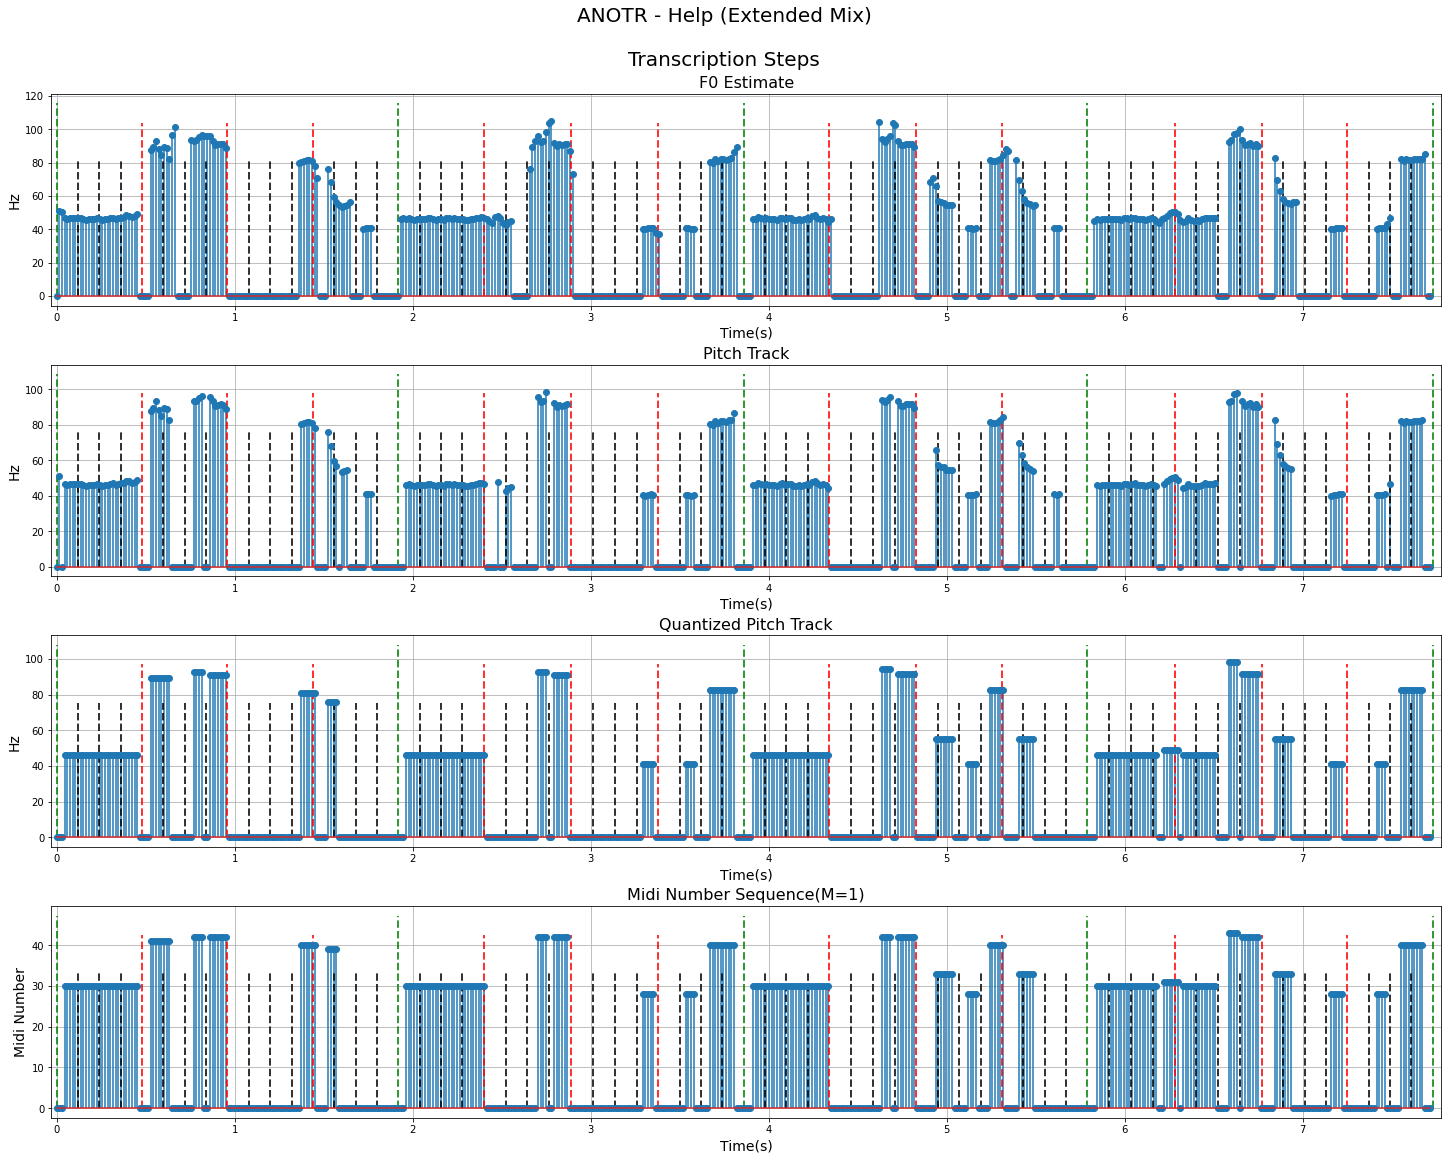

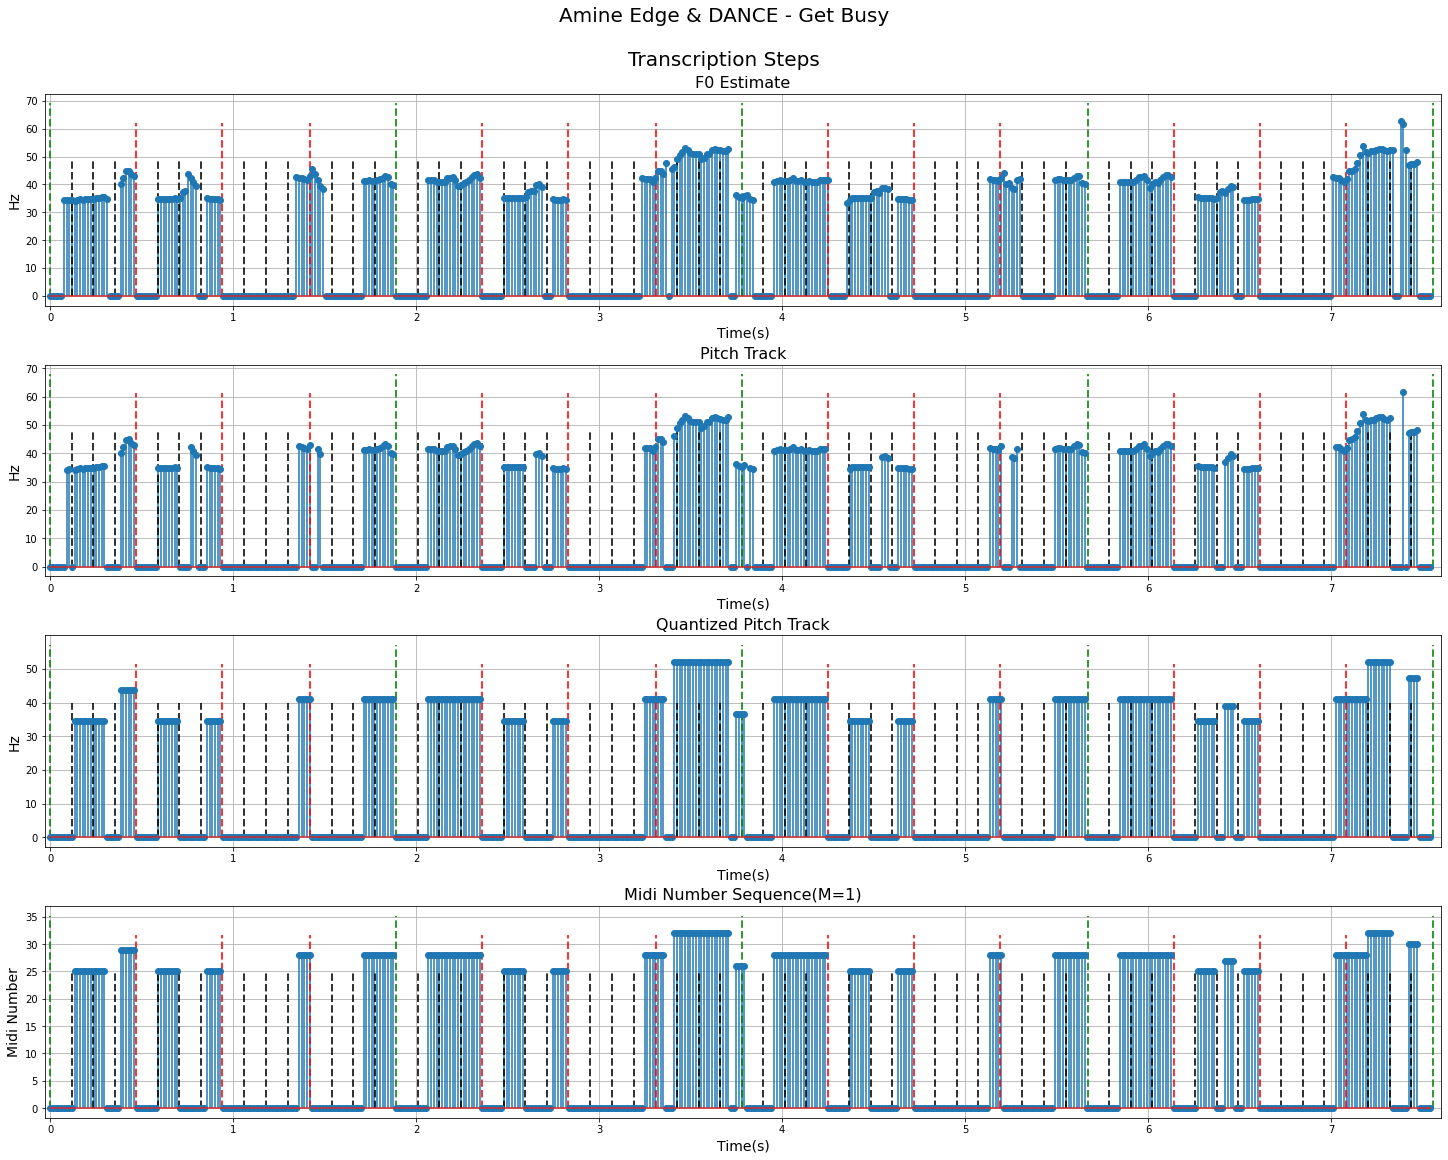

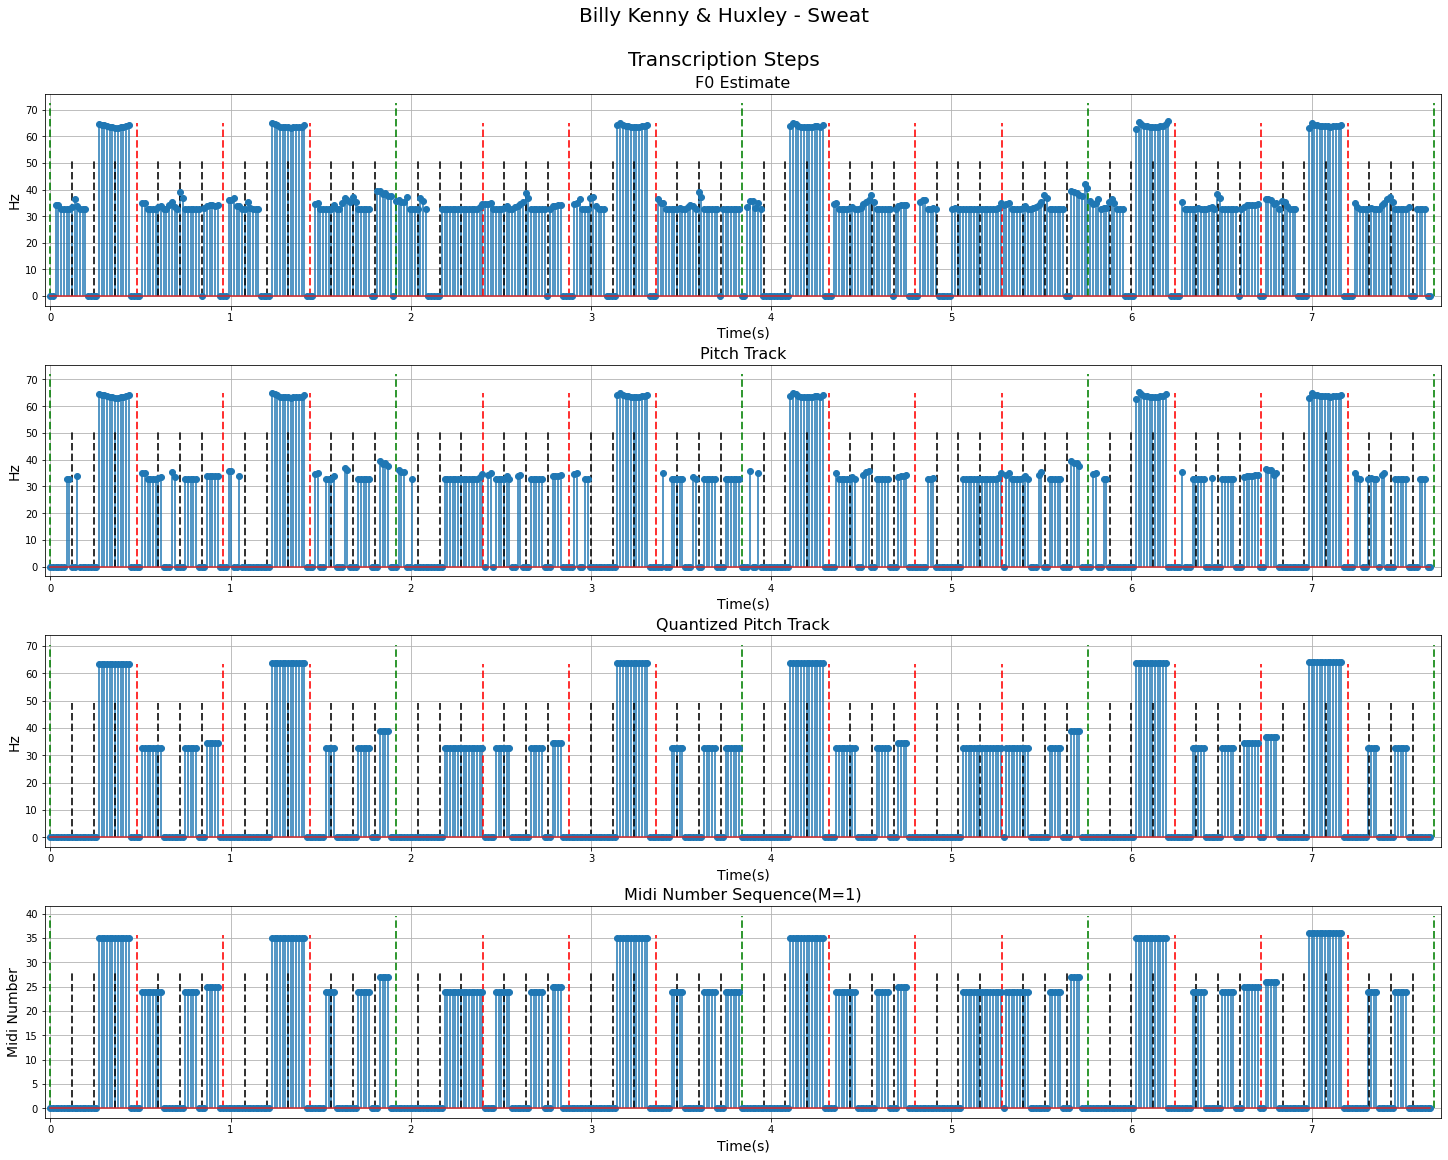

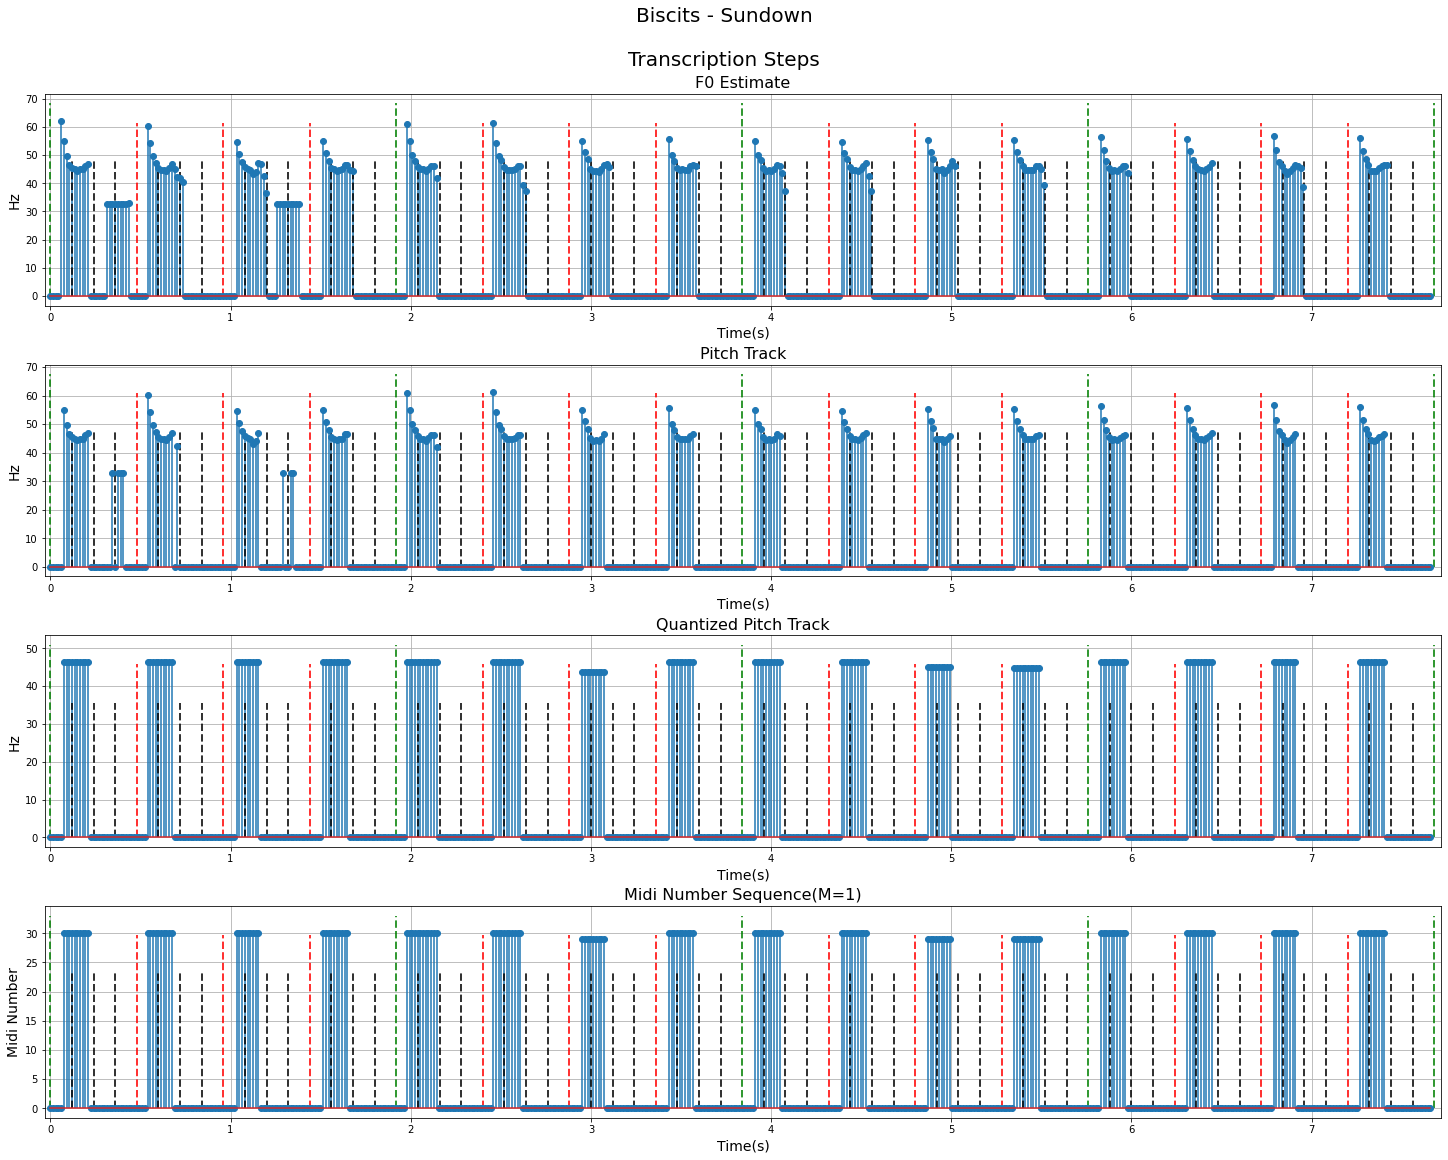

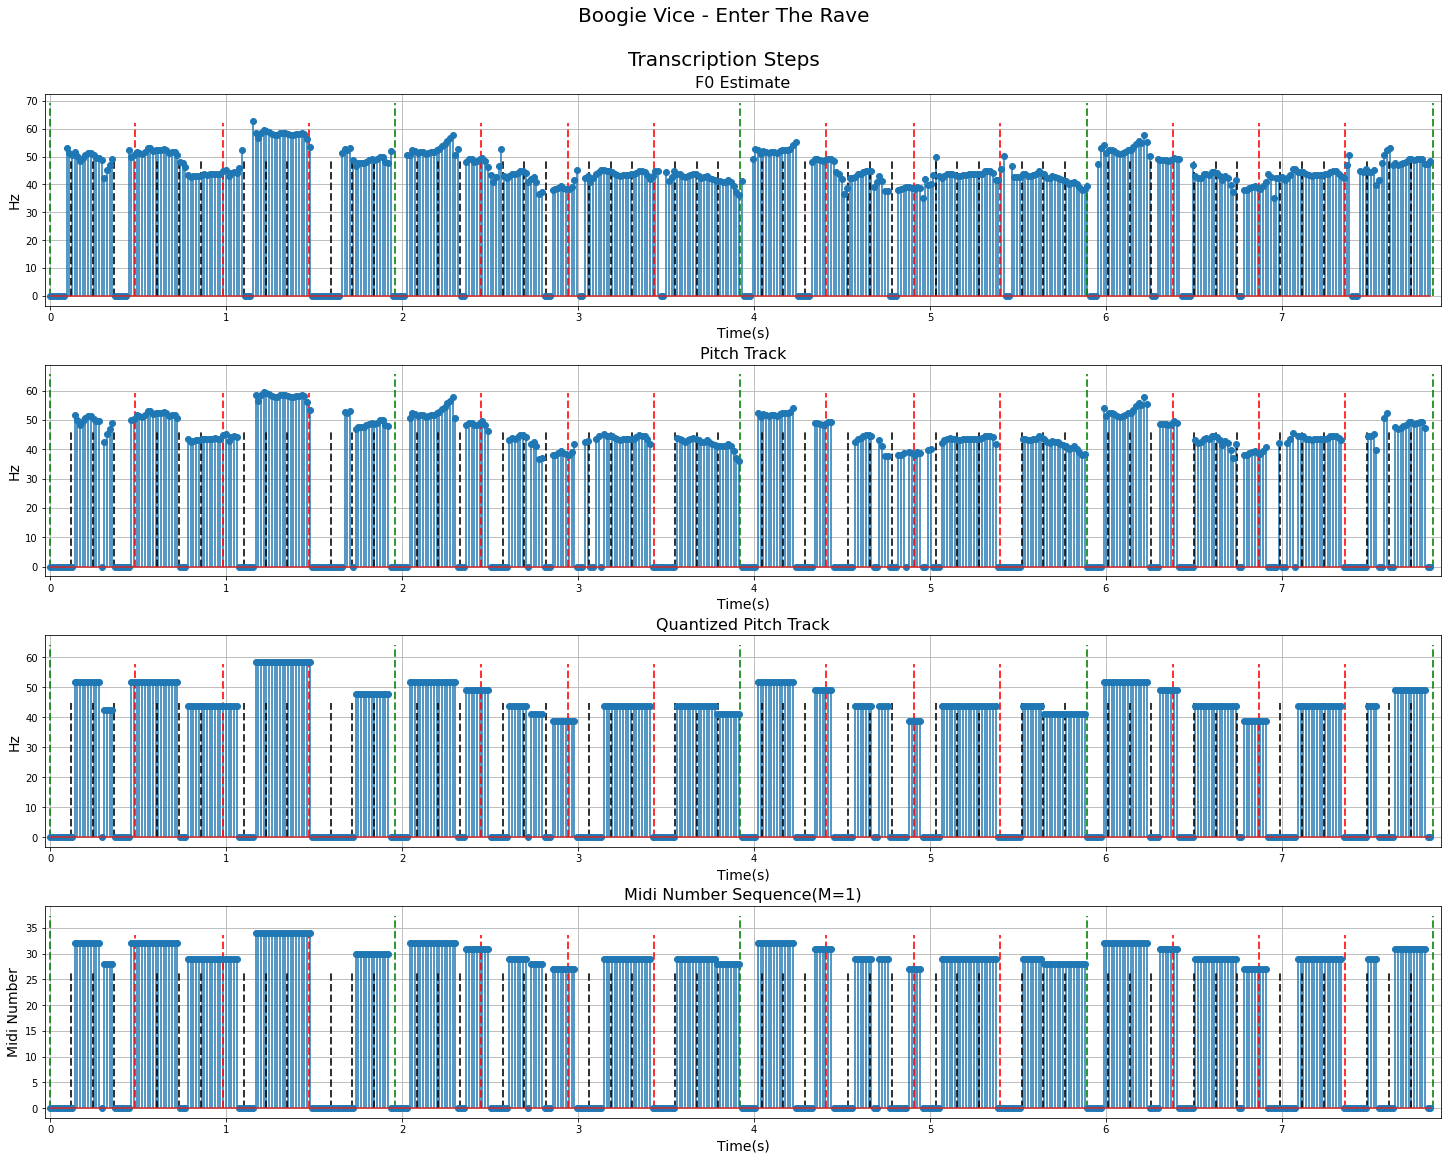

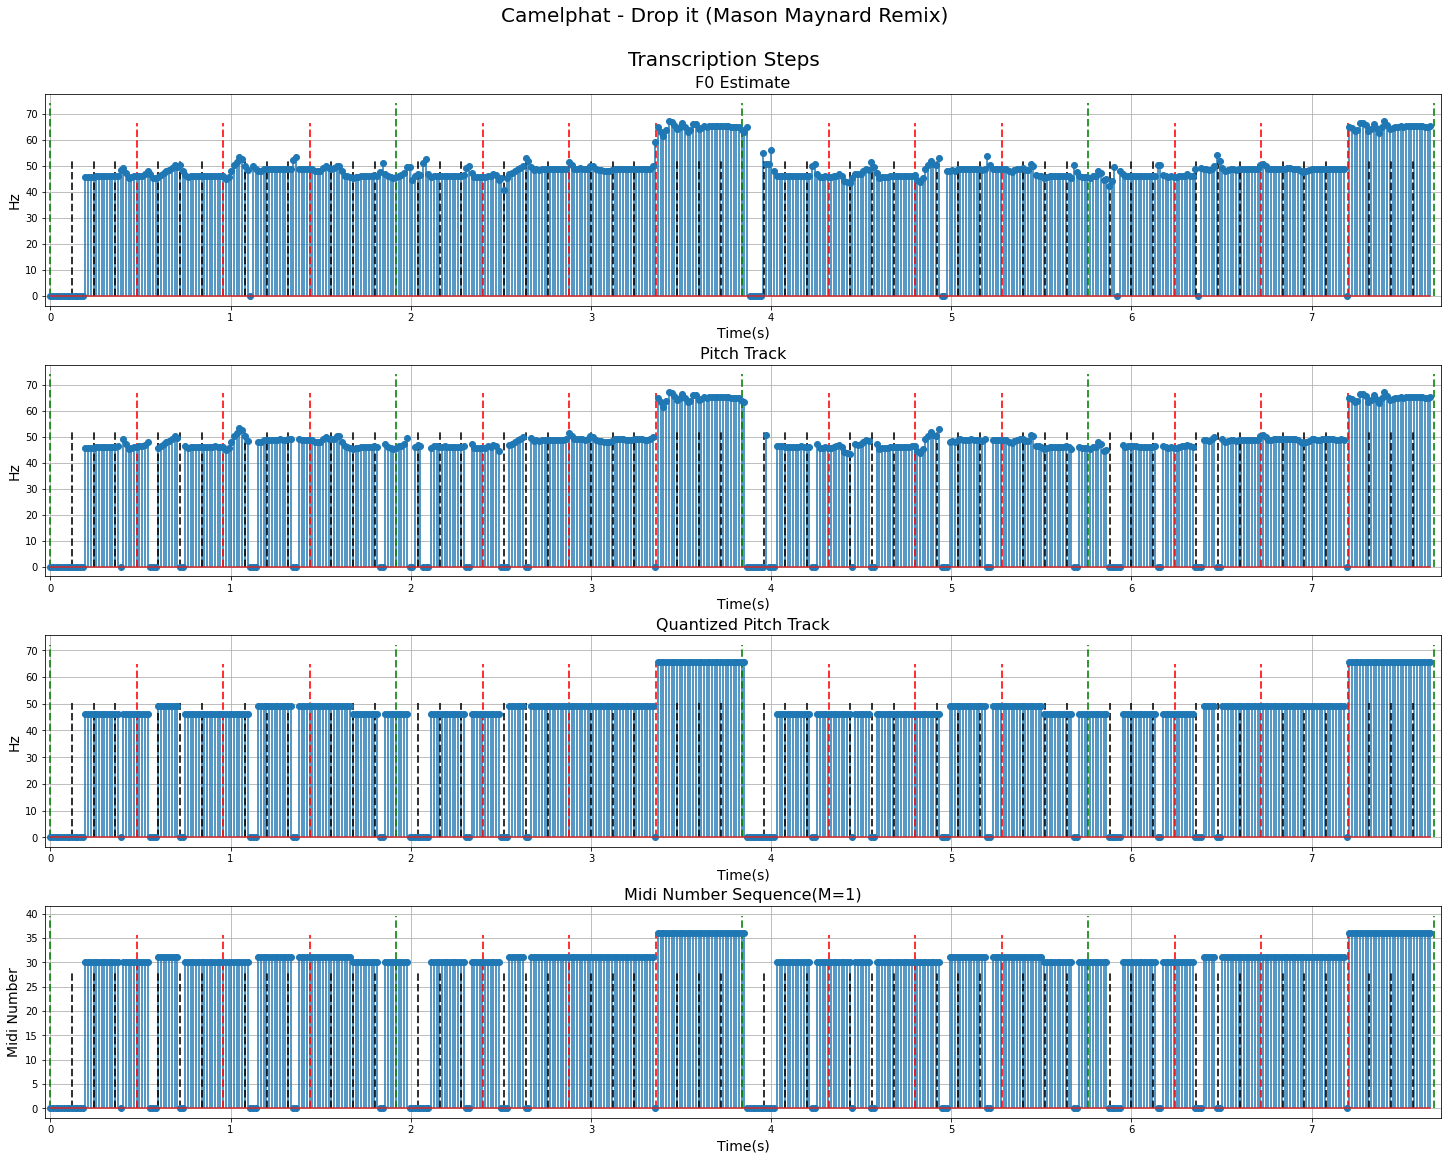

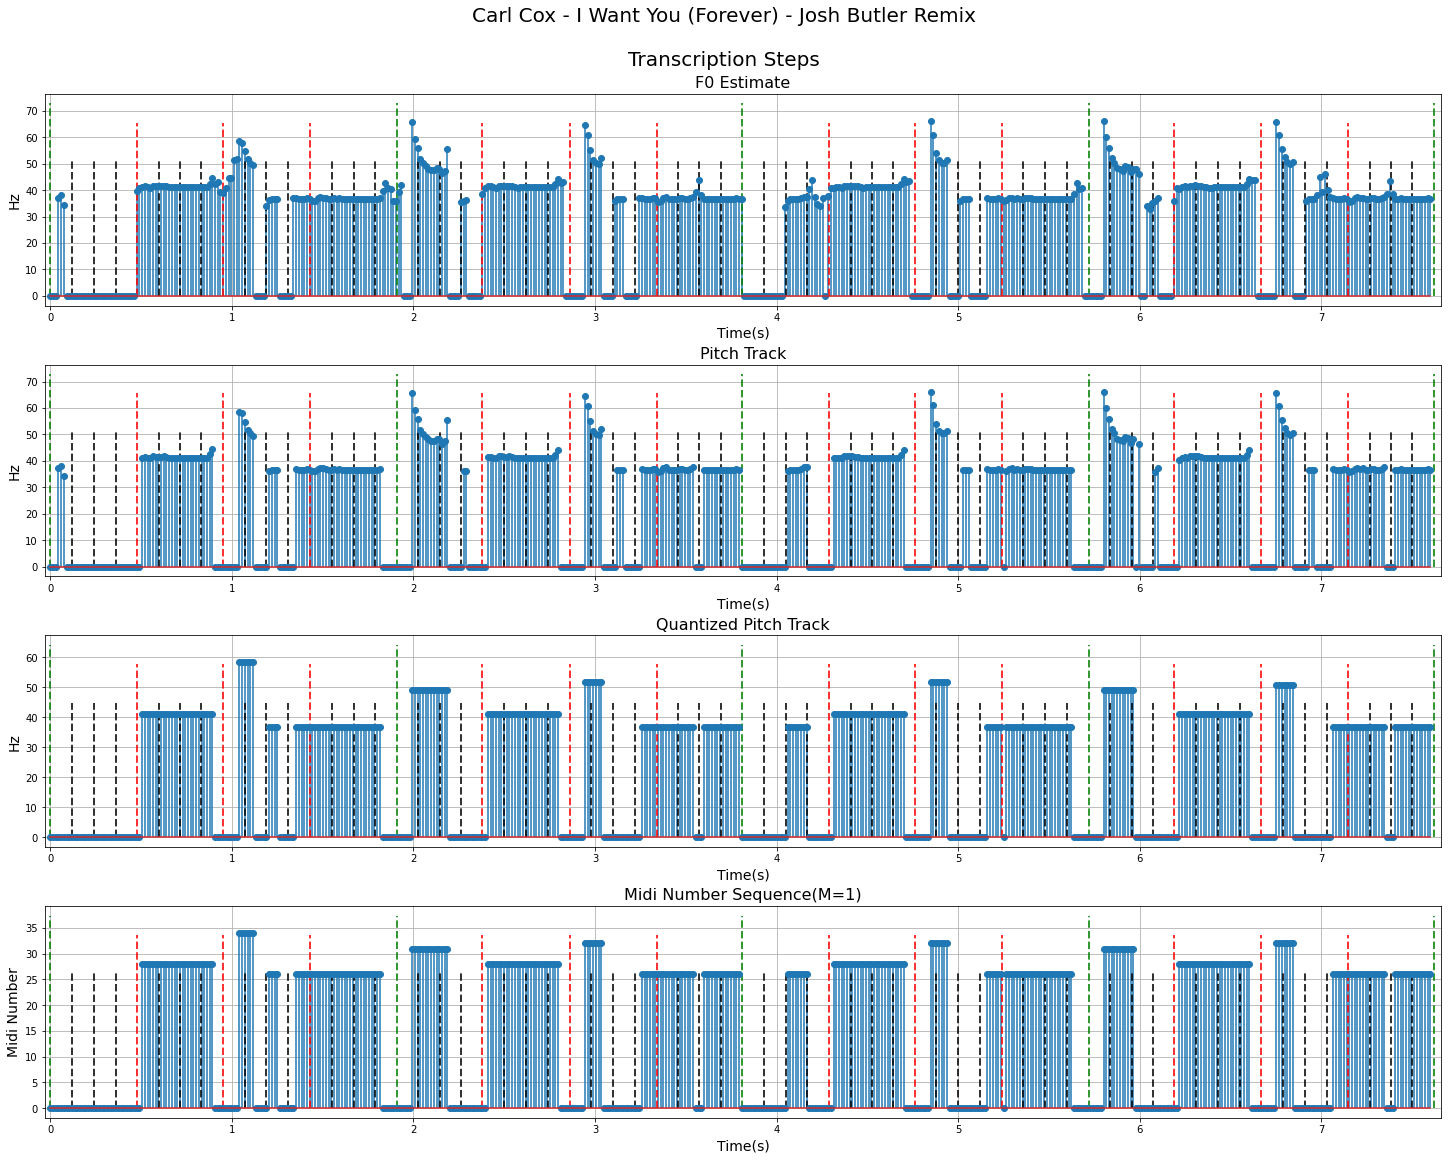

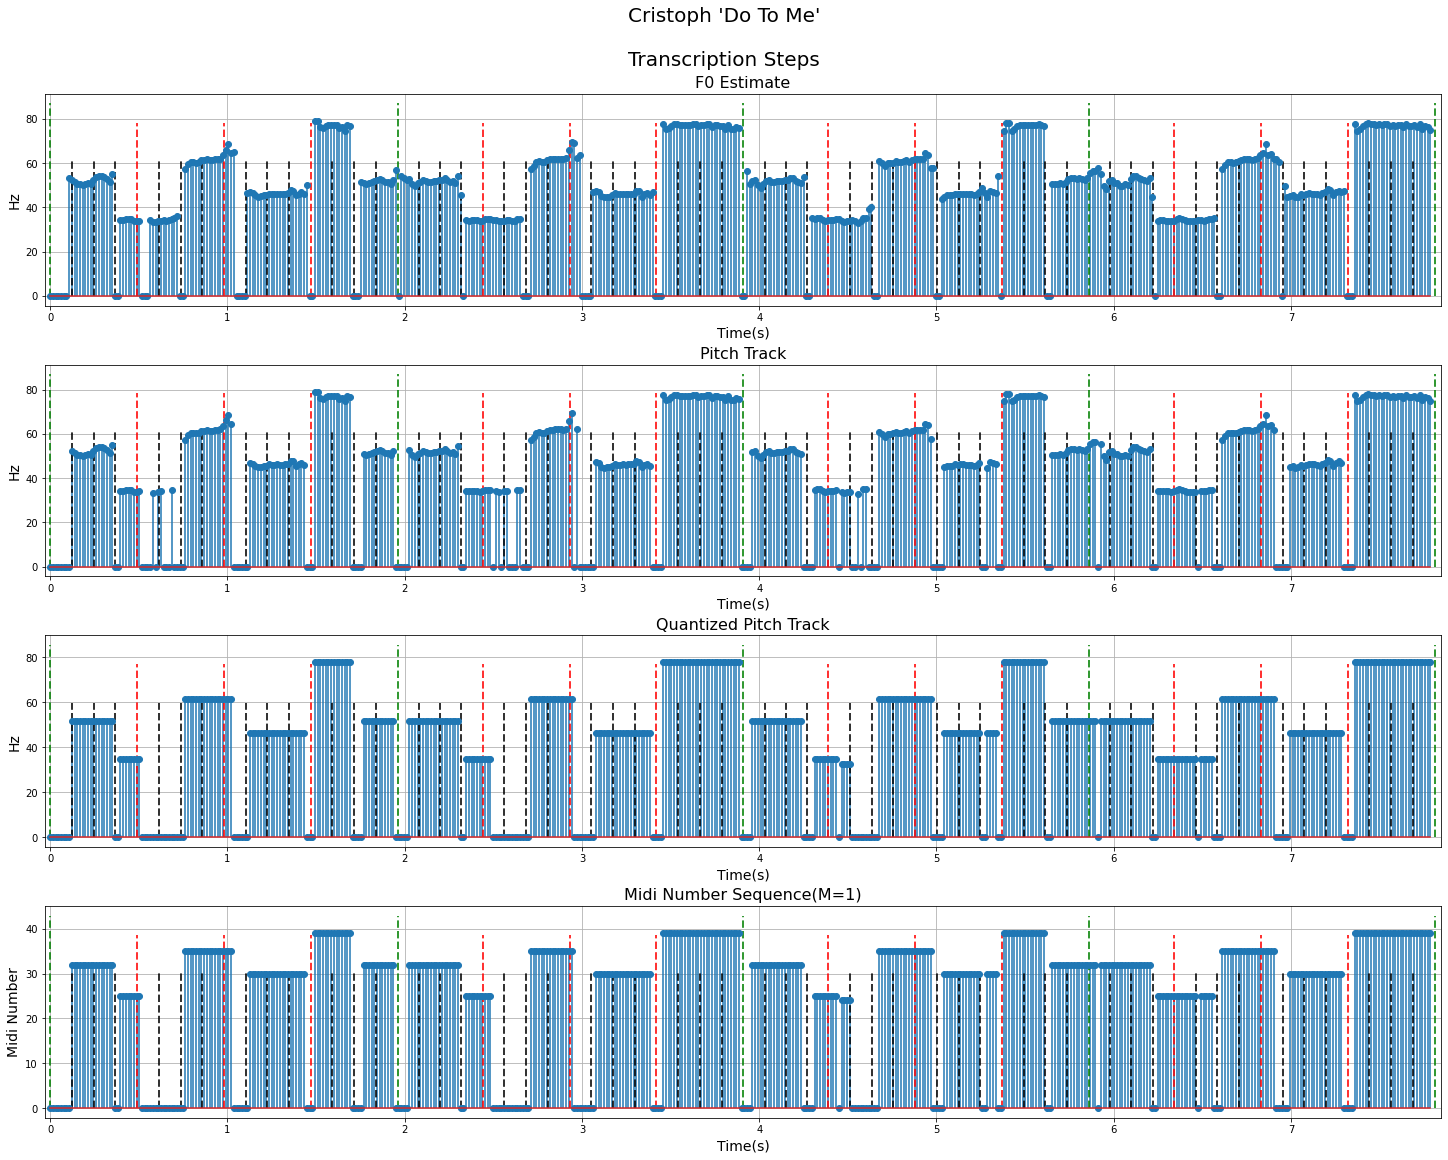

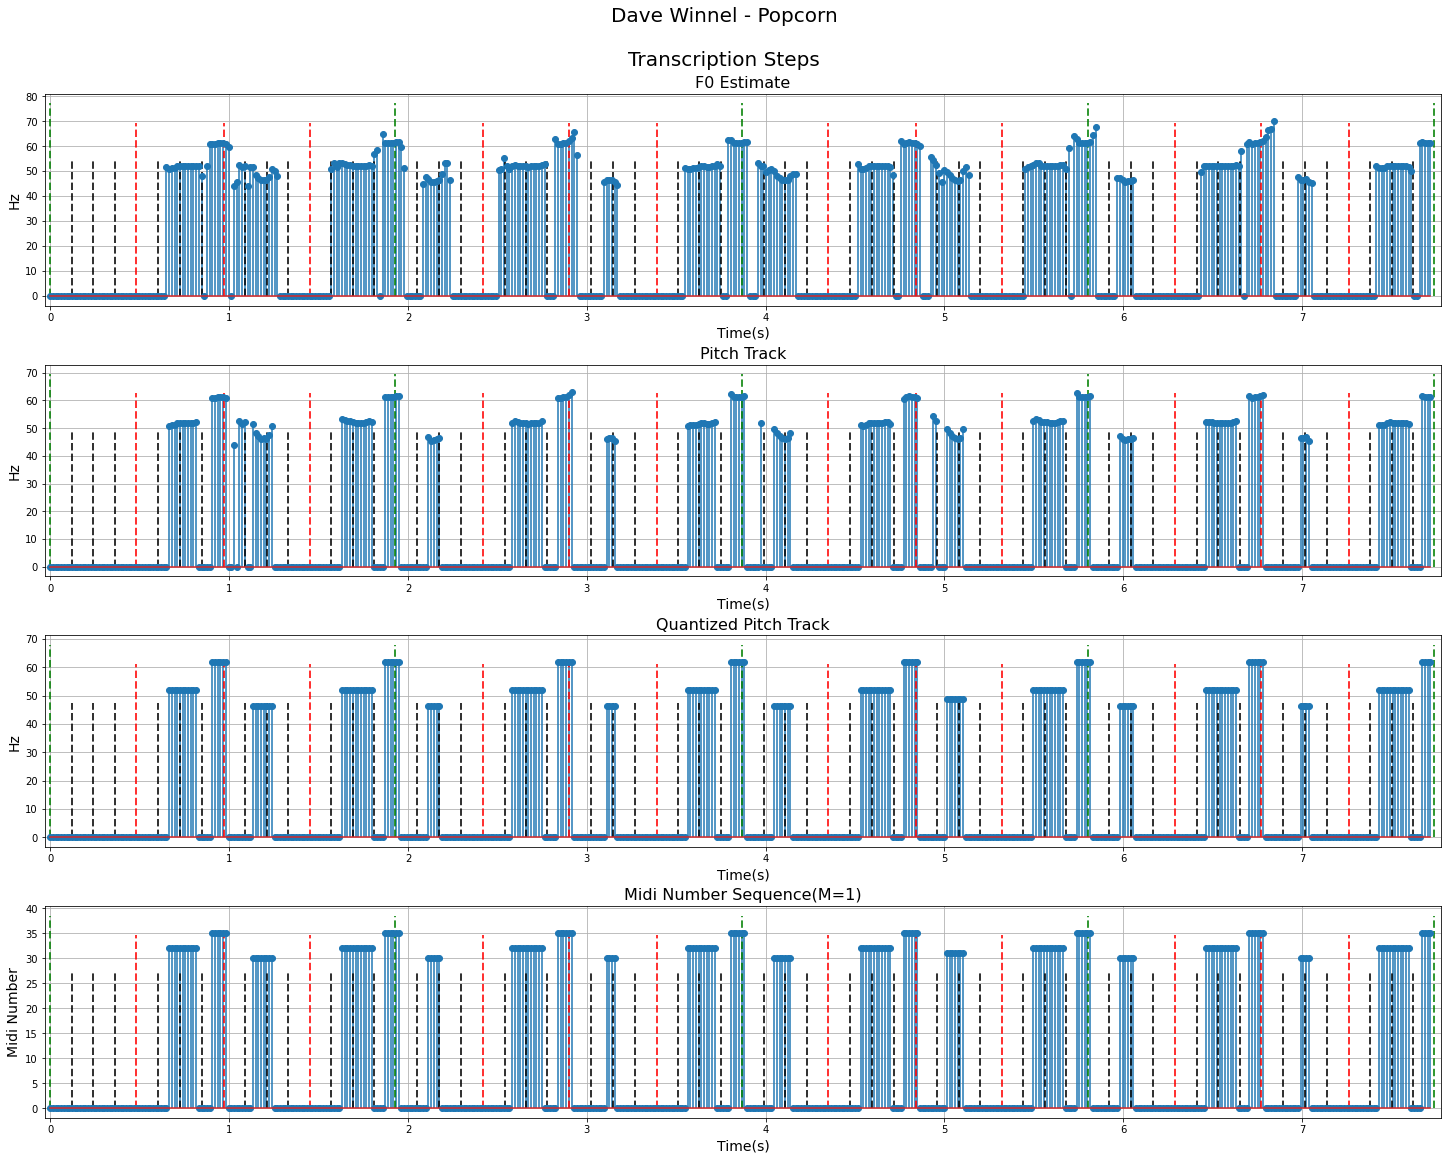

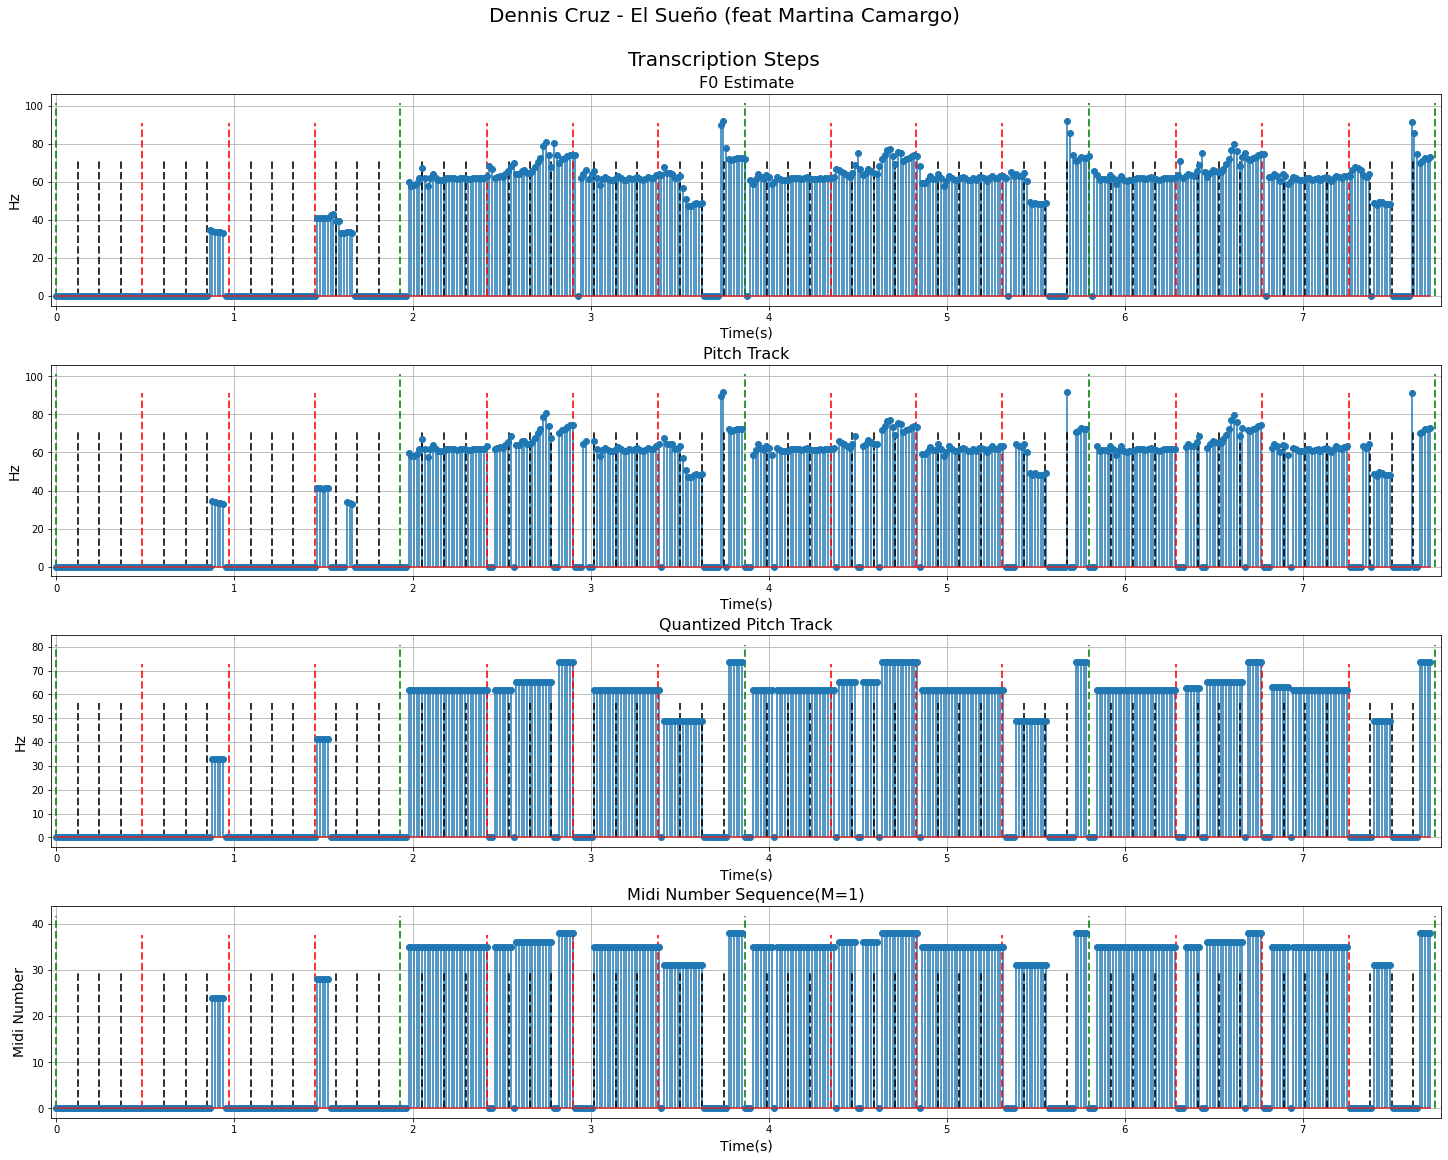

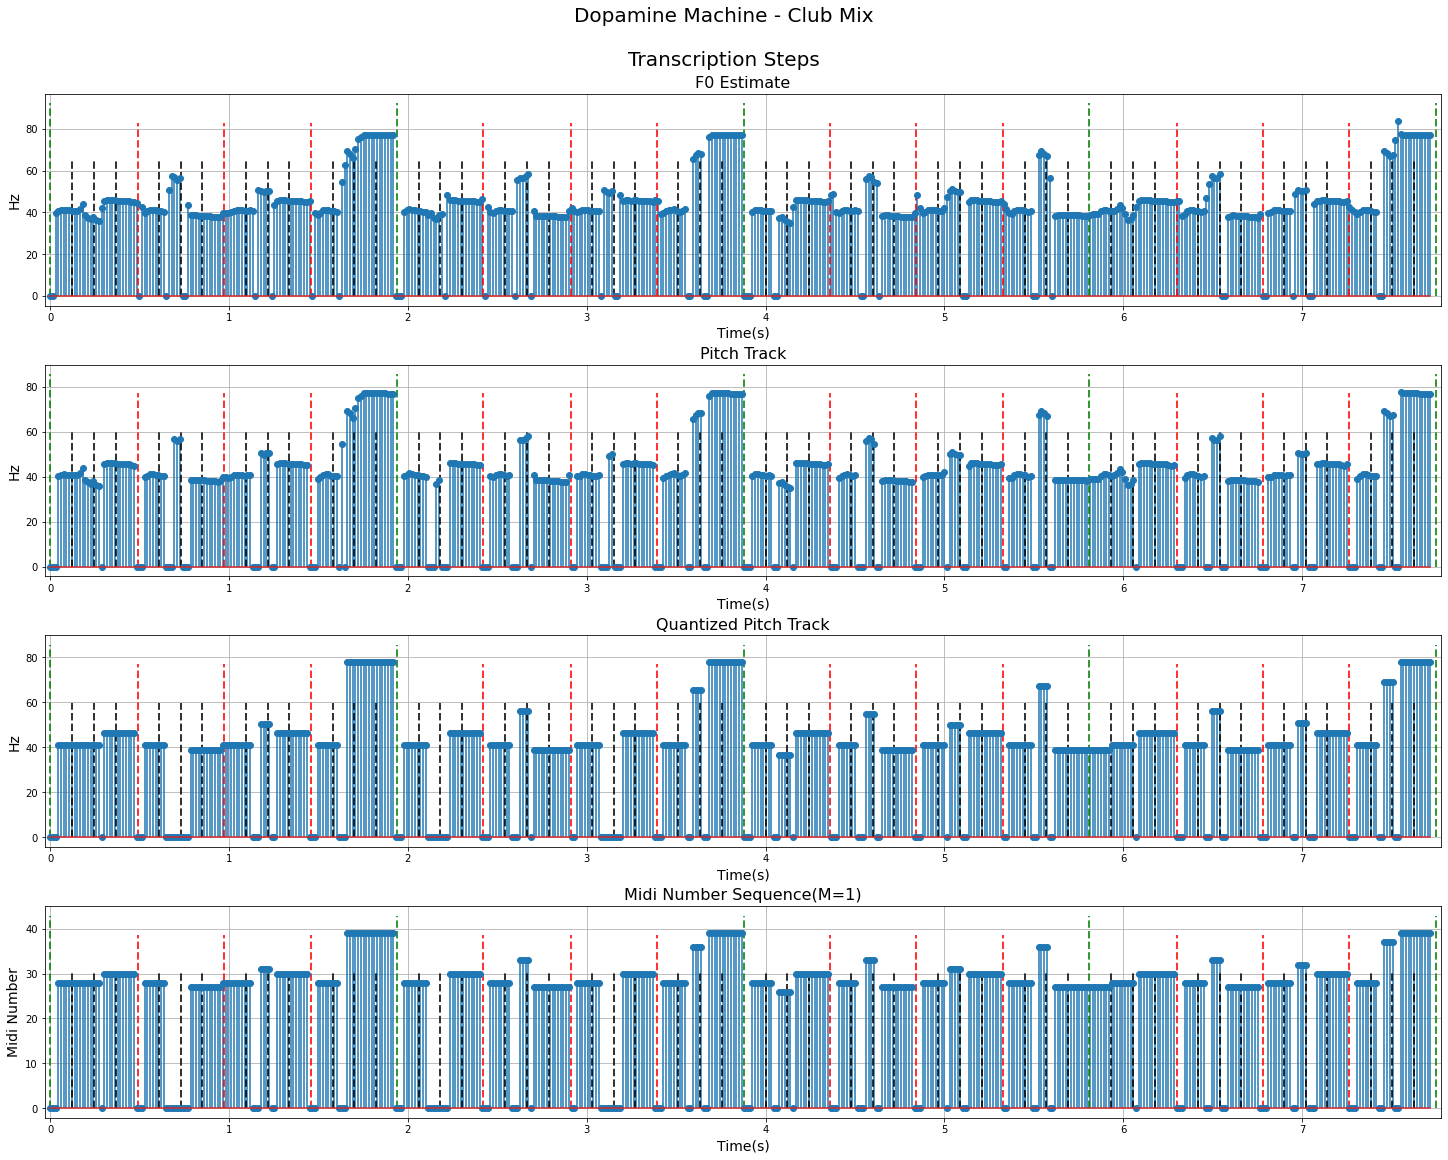

In [6]:
#figures_dir = os.path.join(FIGURES_DIR, 'hop32_frame2_C1C3_eps1')
figures_dir = os.path.join(FIGURES_DIR, 'bpm_est-ff2-hop32-eps005-C1C3')
M = 1

for track_title in track_titles:

    output_dir = os.path.join(OUTPUT_DIR, track_title)

    bassline_path = os.path.join(output_dir, 'bass_line', track_title+'.npy')
    F0_path = os.path.join(output_dir, 'F0_estimate', track_title+'.npy')
    pitch_track_path = os.path.join(output_dir, 'pitch_track', track_title+'.npy')
    q_pitch_track_path = os.path.join(output_dir, 'quantized_pitch_track', track_title+'.npy')

    chorus_beat_positions = get_chorus_beat_positions(output_dir)
    bassline = np.load(bassline_path)
    F0_estimate = np.load(F0_path)
    pitch_track = np.load(pitch_track_path)
    quantized_pitch_track = np.load(q_pitch_track_path)
    midi_sequence = frequency_to_midi_sequence(quantized_pitch_track[1])

    plot.F0_related_stem(track_title, chorus_beat_positions, F0_estimate,
                         pitch_track, quantized_pitch_track, midi_sequence, M=1,
                        plot_dir=figures_dir)    

# Spectrogram Plots

In [ ]:
n_fft = 4096*8

bassline_spectrogram = extract_dB_spectrogram(bassline, n_fft, win_length, hop_length)

In [ ]:
# spectrogram
beat_factor = 8
win_length = int((beat_length/beat_factor)*fs) 
hop_length = int(win_length/2)

bassline_spectrogram = extract_dB_spectrogram(bassline, n_fft, win_length, hop_length)

# F0 estimation  
beat_factor = 4 # quarter 4, 1/8th 8...
frame_length = int((beat_length/beat_factor)*fs)

In [ ]:
def print_plot_play(x, Fs=44100, text=''):  
    import IPython.display as ipd
    print('%s\n' % (text))
    print('Fs = %d, x.shape = %s, x.dtype = %s' % (Fs, x.shape, x.dtype))
    plt.figure(figsize=(8, 2))
    plt.plot(x, color='gray')
    plt.xlim([0, x.shape[0]])
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()
    ipd.display(ipd.Audio(data=x, rate=Fs))